## Import necessary Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [2]:
import tensorflow
from tensorflow import keras
from keras.models import  Sequential
from keras.layers import Dense, Dropout

In [86]:
df = pd.read_csv(r"C:\Users\GUDLA RAGUWING\Downloads\data\demo_data\6.overlap.csv", header = None)

## Performing little bit of EDA

In [87]:
df.columns = ['feature_1', 'feature_2','output'] #changing the columns name to more readable ones.

In [88]:
df

,feature_1,feature_2,output
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0
...,...,...,...
95,6.7,3.0,1
96,6.3,2.5,1
97,6.5,3.0,1
98,6.2,3.4,1


In [89]:
df.isna().sum() # no missing values

feature_1    0
feature_2    0
output       0
dtype: int64

In [90]:
df['output'].value_counts(normalize=True) # there is no imbalance

0    0.5
1    0.5
Name: output, dtype: float64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  100 non-null    float64
 1   feature_2  100 non-null    float64
 2   output     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [92]:
df.describe(include='all')

,feature_1,feature_2,output
count,100.000000,100.000000,100.000000
mean,6.262000,2.872000,0.500000
std,0.662834,0.332751,0.502519
min,4.900000,2.000000,0.000000
25%,5.800000,2.700000,0.000000
50%,6.300000,2.900000,0.500000
75%,6.700000,3.025000,1.000000
max,7.900000,3.800000,1.000000


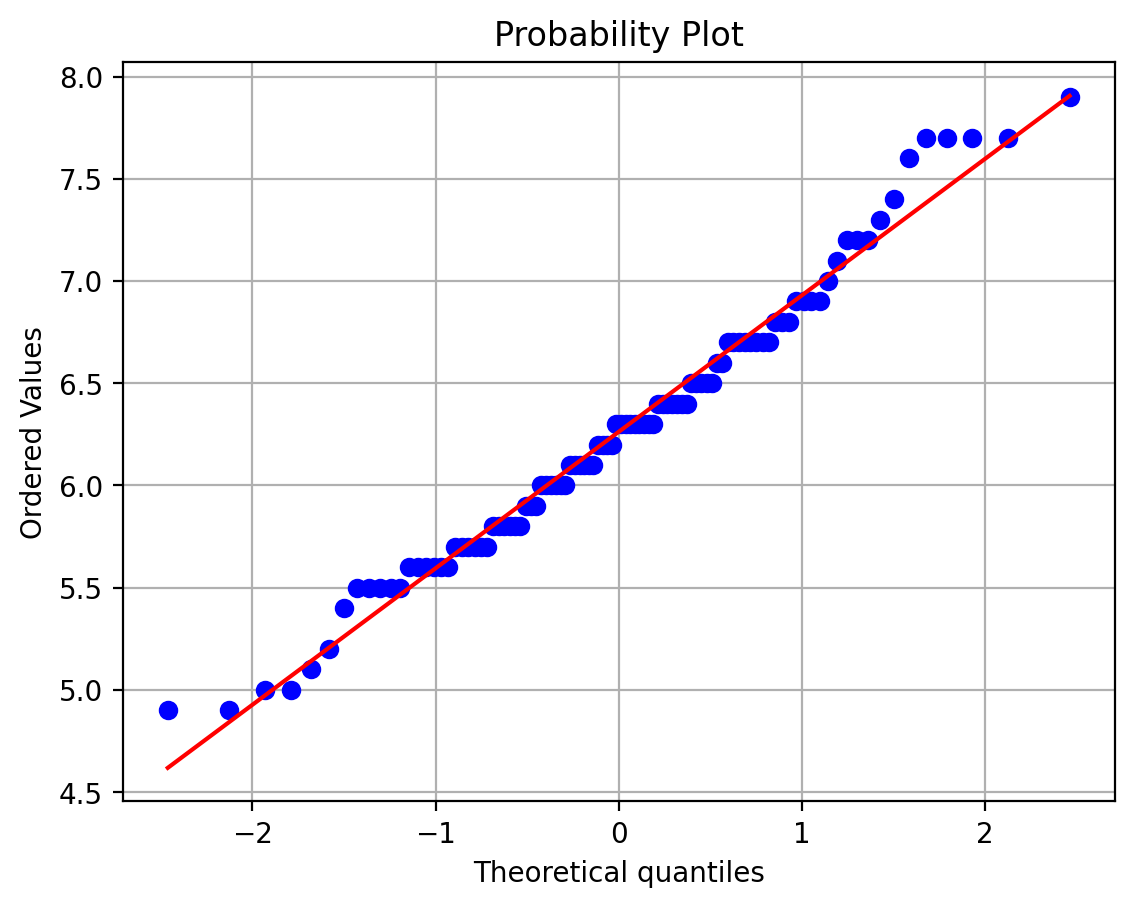

In [93]:
# 1.QQ plot
from scipy import stats
stats.probplot(df['feature_1'], dist='norm', plot = plt)
plt.grid();

### Intution:
* As you can observe that our input feature : feature_1 is moderately normal distributed as some of the points are not lying on the line.

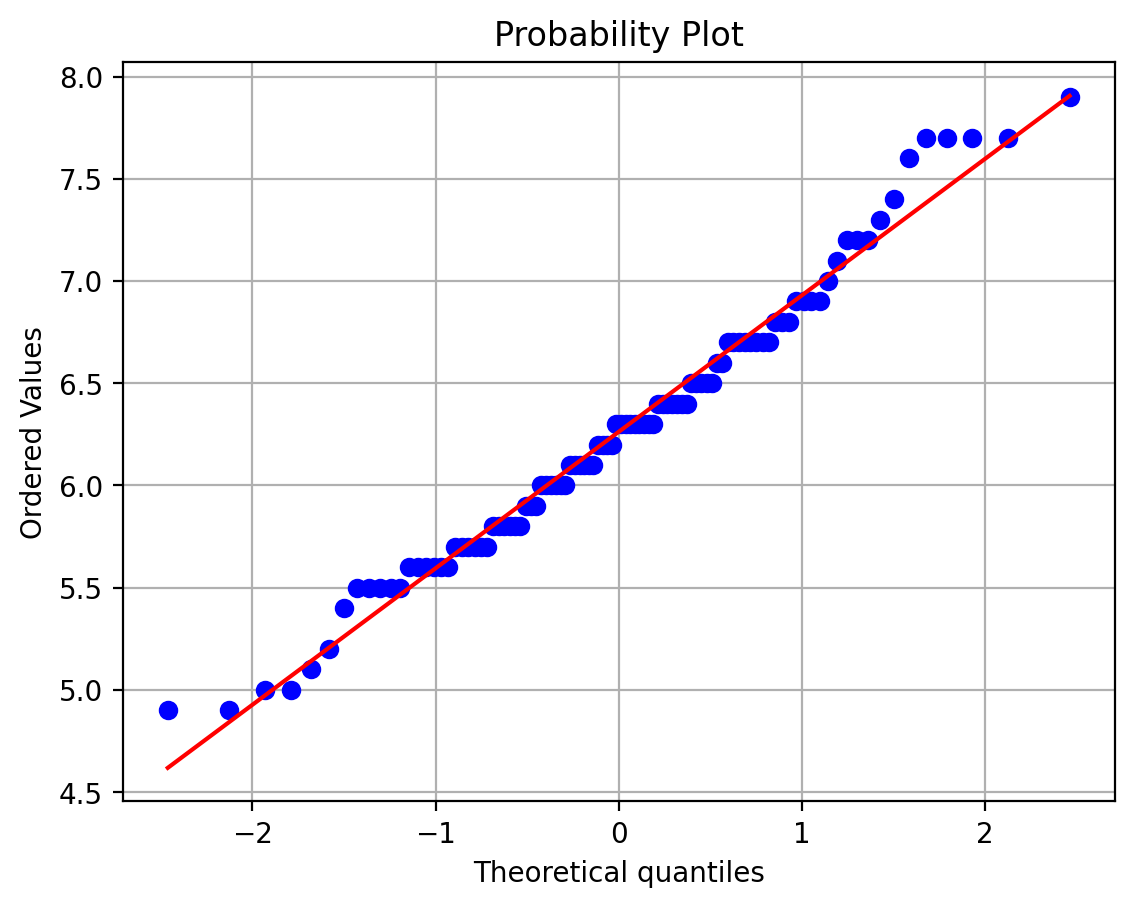

In [94]:
# 1.QQ plot
from scipy import stats
stats.probplot(df['feature_1'], dist='norm', plot = plt)
plt.grid();

### Intution:
* As you can observe that our input feature : feature_2  is moderately normal distributed as some of the points are not lying on the line.

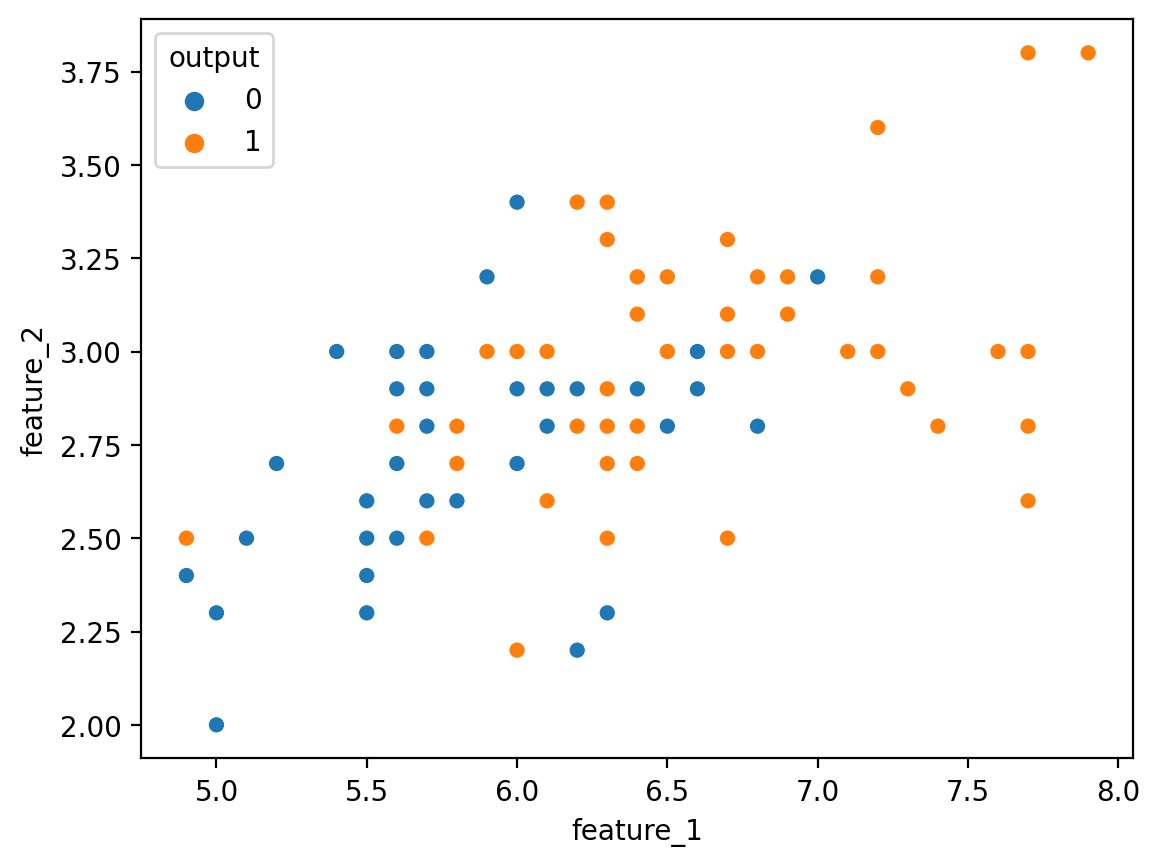

In [95]:
sns.scatterplot(x = 'feature_1',y='feature_2', hue = 'output', data = df);

### Intution
* clearly we can observe that the data is non-linear
* We can observe that the data points are overlapping 

## Segregation of input and output features

In [96]:
X = df[['feature_1','feature_2']]
y=df['output']

## Spliting the data into train and test

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=20)

## Data preprocessing of train and test data

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_trns=sc.fit_transform(X_train)

In [99]:
X_test_trns = sc.transform(X_test)

## Building the Architecture

In [111]:
model = Sequential()
model.add(Dense(6,activation='tanh',kernel_initializer = 'he_uniform',input_dim = 2))
model.add(Dense(5,activation='tanh',kernel_initializer = 'he_uniform'))
model.add(Dense(4,activation='tanh',kernel_initializer = 'he_uniform'))
model.add(Dense(3,activation='tanh',kernel_initializer = 'he_uniform'))
model.add(Dense(2,activation='tanh',kernel_initializer = 'he_uniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer = 'he_uniform'))

In [112]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 6)                 18        
                                                                 
 dense_37 (Dense)            (None, 5)                 35        
                                                                 
 dense_38 (Dense)            (None, 4)                 24        
                                                                 
 dense_39 (Dense)            (None, 3)                 15        
                                                                 
 dense_40 (Dense)            (None, 2)                 8         
                                                                 
 dense_41 (Dense)            (None, 1)                 3         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable 

## Compiling the Architecture & Model Creation

In [113]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

## Model Training Phase

In [114]:
history = model.fit(X_train_trns,y_train,epochs =300,validation_split = 0.2 )

Epoch 1/300
2/2 [==============================] - 2s 235ms/step - loss: 0.8690 - accuracy: 0.3125 - val_loss: 0.8597 - val_accuracy: 0.3750
Epoch 2/300
2/2 [==============================] - 0s 47ms/step - loss: 0.8482 - accuracy: 0.3281 - val_loss: 0.8431 - val_accuracy: 0.3750
Epoch 3/300
2/2 [==============================] - 0s 62ms/step - loss: 0.8264 - accuracy: 0.3750 - val_loss: 0.8274 - val_accuracy: 0.3750
Epoch 4/300
2/2 [==============================] - 0s 47ms/step - loss: 0.8066 - accuracy: 0.3750 - val_loss: 0.8121 - val_accuracy: 0.3750
Epoch 5/300
2/2 [==============================] - 0s 47ms/step - loss: 0.7878 - accuracy: 0.3906 - val_loss: 0.7972 - val_accuracy: 0.3750
Epoch 6/300
2/2 [==============================] - 0s 47ms/step - loss: 0.7692 - accuracy: 0.3906 - val_loss: 0.7830 - val_accuracy: 0.3750
Epoch 7/300
2/2 [==============================] - 0s 47ms/step - loss: 0.7503 - accuracy: 0.4219 - val_loss: 0.7695 - val_accuracy: 0.3750
Epoch 8/300
2/2 [==

## Prediction Phase

In [115]:
Y_cap = model.predict(X_test_trns)

1/1 [==============================] - 0s 94ms/step


In [116]:
Y_cap_f = np.where(Y_cap>0.5,1,0)

In [117]:
Y_cap_f

array([[1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

## Model Evaluation

In [118]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_cap_f)

0.55

## Ploting the Best Decision Surface Region

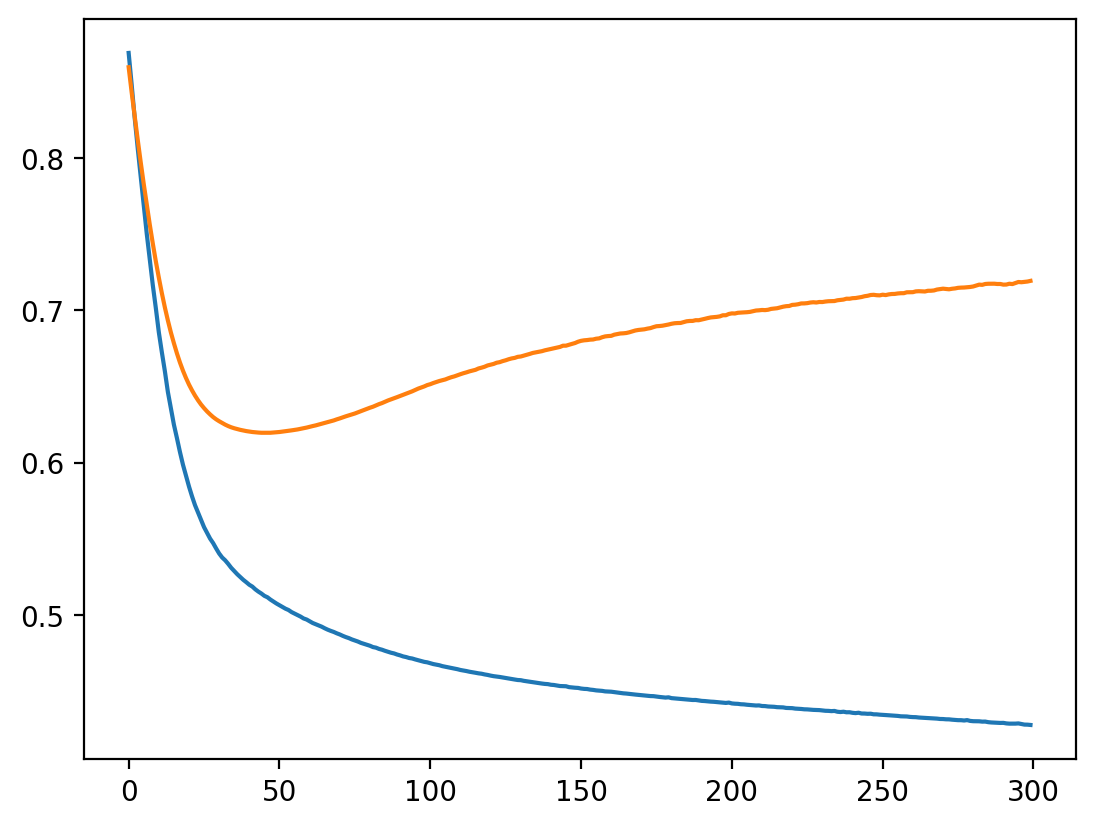

In [119]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [120]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 13s 1ms/step


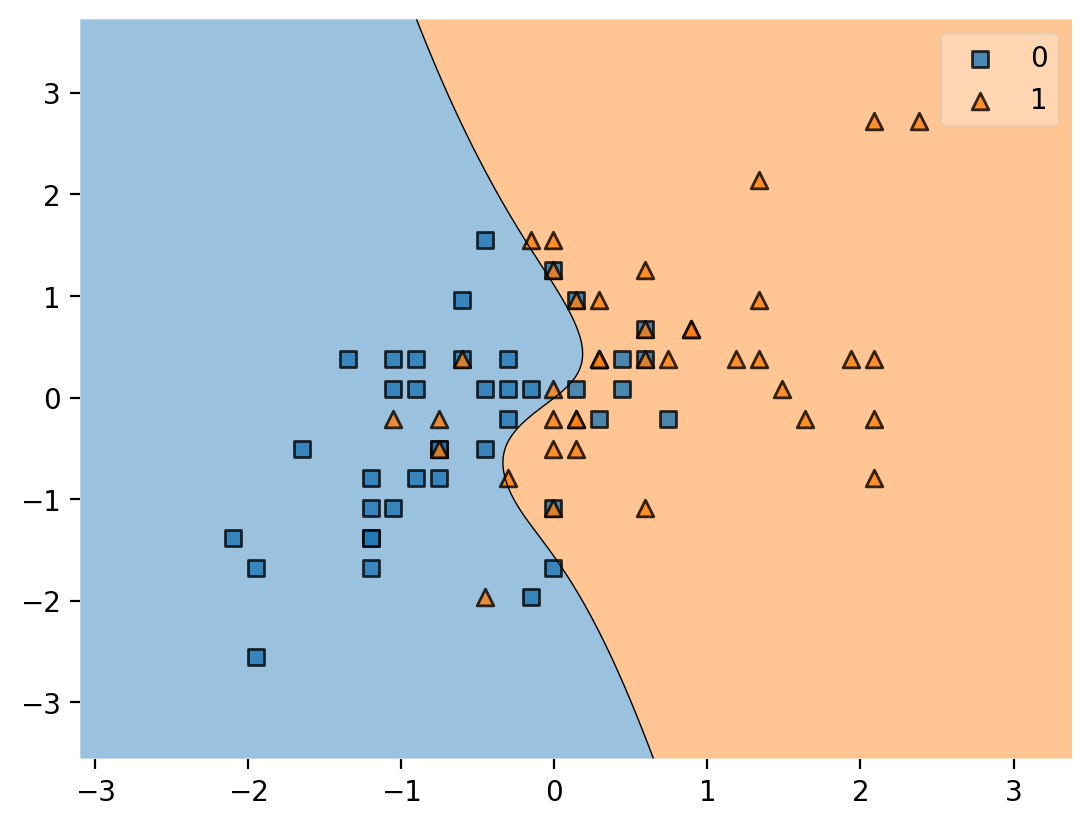

In [121]:
plot_decision_regions(X_train_trns, y_train.values.astype(int), clf = model);

9600/9600 [==============================] - 16s 2ms/step


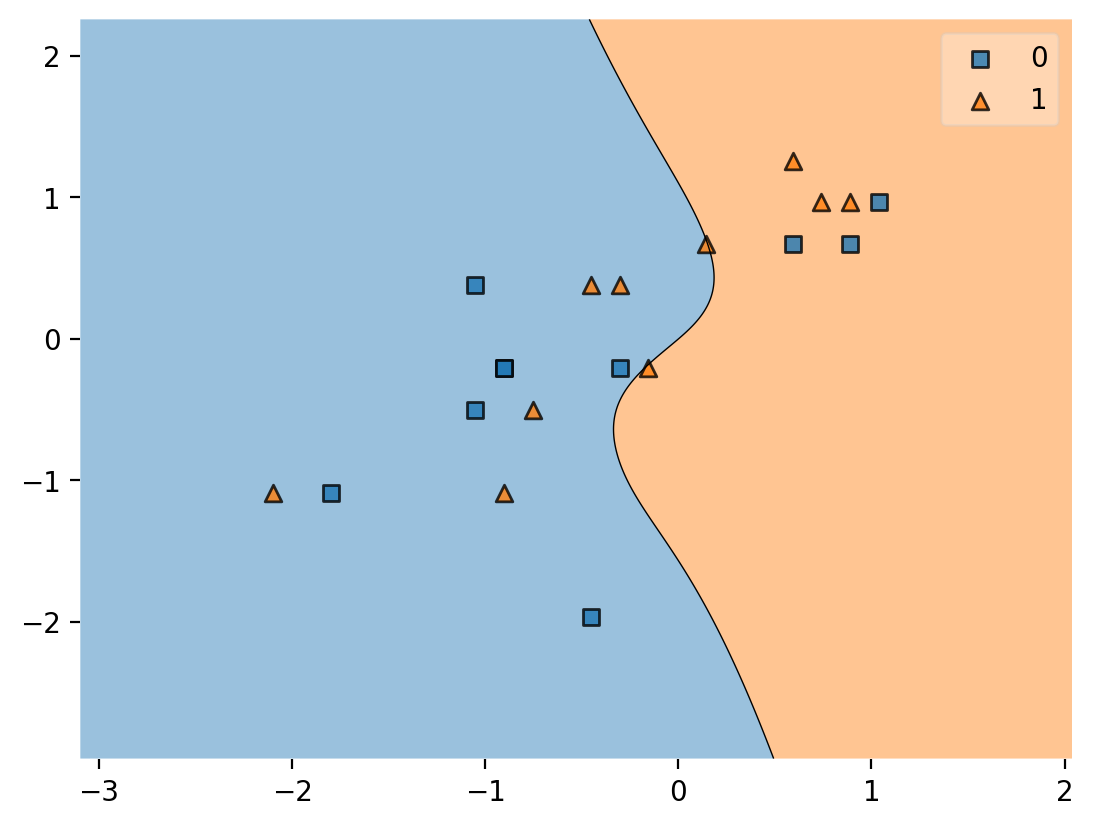

In [122]:
plot_decision_regions(X_test_trns, y_test.values.astype(int), clf = model);